<a href="https://colab.research.google.com/github/Hemashree212004/Shree/blob/master/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

<Axes: xlabel='longitude', ylabel='latitude'>

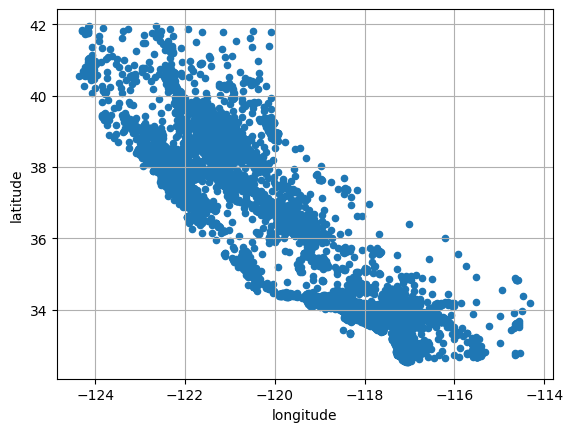

In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data(): #function definition
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()
print(housing)
housing.info()
housing.head()
housing.tail()
print(housing["ocean_proximity"].value_counts())
print(housing["total_rooms"].value_counts())
print(housing["total_bedrooms"].value_counts())
housing.plot(kind='scatter' ,x="longitude",y="latitude",grid=True)

housing.plot(kind='scatter' ,x="longitude",y="latitude",grid=True)
<

<Axes: xlabel='longitude', ylabel='latitude'>

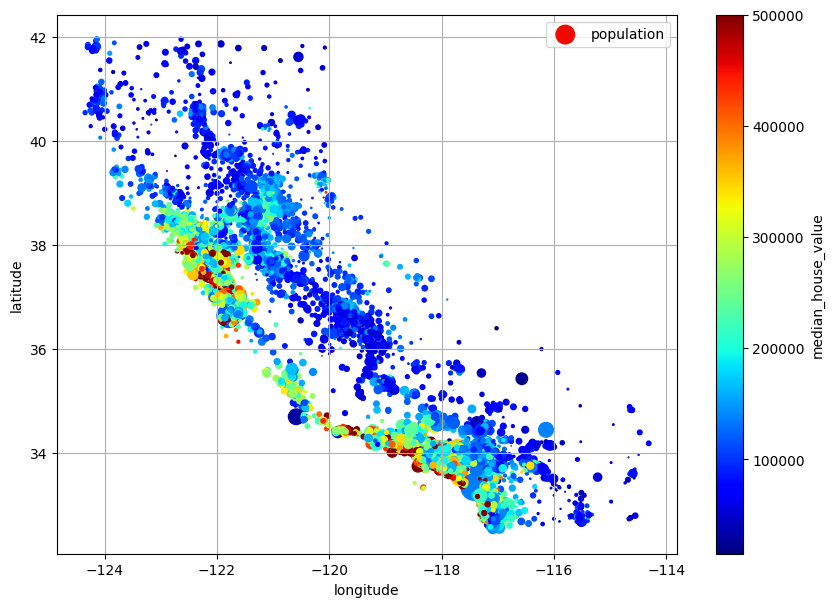

In [ ]:
housing.plot(kind = 'scatter',x='longitude',y='latitude',grid =True,s=housing['population']/100,label='population',c='median_house_value',
             cmap='jet',colorbar=True,legend=True,sharex=False,figsize=(10,7))


In [ ]:
import numpy as np
import pandas as pd

housing['income_cat']= pd.cut(housing['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
splitter = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=40)
strat_splits=[]
for train_index,test_index in splitter.split(housing,housing['income_cat']):
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  strat_splits.append([strat_train_set_n,strat_test_set_n])
strat_train_set,strat_test_set = strat_splits[0]

strat_train_set,strat_test_set = train_test_split(housing,test_size=0.2,stratify=housing['income_cat'],random_state=40)

for set_ in (strat_train_set,strat_test_set):
  set_.drop(['income_cat'],axis=1,inplace=True)

housing = strat_train_set.copy()
corr_matrix = housing.corr(numeric_only=True)

In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.695420
total_rooms,0.162204
housing_median_age,0.092696
households,0.087219
total_bedrooms,0.068445
population,-0.003224
longitude,-0.045961
latitude,-0.140434


In [ ]:
null_rows_idx=housing.isnull().any(axis=1)
housing.loc[null_rows_idx]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13086,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,221500.0,<1H OCEAN
6407,-117.27,32.85,26.0,1373.0,NaN,608.0,268.0,4.4250,475000.0,NEAR OCEAN
17065,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,76400.0,INLAND
19137,-118.53,34.26,18.0,3674.0,NaN,1590.0,550.0,8.1760,308400.0,<1H OCEAN
19543,-122.44,37.73,39.0,1912.0,NaN,970.0,406.0,4.7813,275500.0,NEAR BAY
9456,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
4063,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
1441,-122.39,37.59,32.0,4497.0,NaN,1846.0,715.0,6.1323,500001.0,NEAR OCEAN
11020,-119.33,36.30,11.0,3045.0,NaN,1563.0,516.0,5.4337,133800.0,INLAND
8263,-118.35,33.90,31.0,1547.0,NaN,956.0,287.0,3.4698,225000.0,<1H OCEAN


In [ ]:
housing_option1=housing.copy()
housing_option1.dropna(subset='total_bedrooms',inplace=True)
housing_option2=housing.copy()
housing_option2.drop("total_bedrooms",axis=1,inplace=True)
housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
13086,-118.40,34.17,24.0,6347.0,2945.0,1492.0,3.3545,221500.0,<1H OCEAN
6407,-117.27,32.85,26.0,1373.0,608.0,268.0,4.4250,475000.0,NEAR OCEAN
17065,-122.42,40.44,16.0,994.0,495.0,181.0,2.1875,76400.0,INLAND
19137,-118.53,34.26,18.0,3674.0,1590.0,550.0,8.1760,308400.0,<1H OCEAN
19543,-122.44,37.73,39.0,1912.0,970.0,406.0,4.7813,275500.0,NEAR BAY


In [ ]:
housing_option3=housing.copy()
median=housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median,inplace=True)
housing_option3.loc[null_rows_idx].head()

<ipython-input-24-7464fd15f70d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_option3["total_bedrooms"].fillna(median,inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13086,-118.40,34.17,24.0,6347.0,437.0,2945.0,1492.0,3.3545,221500.0,<1H OCEAN
6407,-117.27,32.85,26.0,1373.0,437.0,608.0,268.0,4.4250,475000.0,NEAR OCEAN
17065,-122.42,40.44,16.0,994.0,437.0,495.0,181.0,2.1875,76400.0,INLAND
19137,-118.53,34.26,18.0,3674.0,437.0,1590.0,550.0,8.1760,308400.0,<1H OCEAN
19543,-122.44,37.73,39.0,1912.0,437.0,970.0,406.0,4.7813,275500.0,NEAR BAY


In [ ]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")
housing_num=housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)
imputer.statistics_

array([-1.1853e+02,  3.4260e+01,  2.9000e+01,  2.1470e+03,  4.3700e+02,
        1.1860e+03,  4.1200e+02,  3.5507e+00,  1.7980e+05])

In [ ]:
x=imputer.transform(housing_num)
imputer.feature_names_in_
housing_tr=pd.DataFrame(x,columns=housing_num.columns,index=housing_num.index)
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
13086,-118.40,34.17,24.0,6347.0,437.0,2945.0,1492.0,3.3545,221500.0
6407,-117.27,32.85,26.0,1373.0,437.0,608.0,268.0,4.4250,475000.0
17065,-122.42,40.44,16.0,994.0,437.0,495.0,181.0,2.1875,76400.0
19137,-118.53,34.26,18.0,3674.0,437.0,1590.0,550.0,8.1760,308400.0
19543,-122.44,37.73,39.0,1912.0,437.0,970.0,406.0,4.7813,275500.0


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='longitude', ylabel='latitude'>

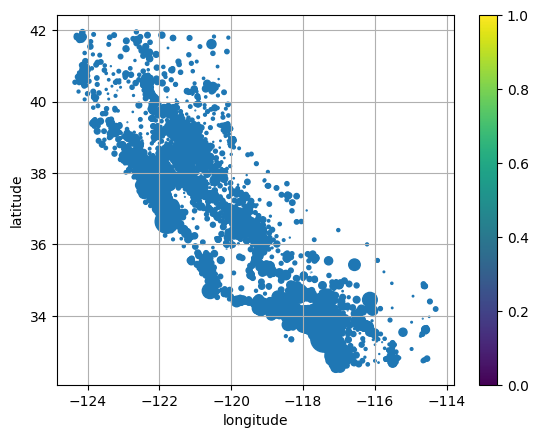

In [ ]:
housing.plot(kind='scatter' ,x="longitude",y="latitude",grid=True, s=housing["population"]/100,cmap="jet",colorbar=True)


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

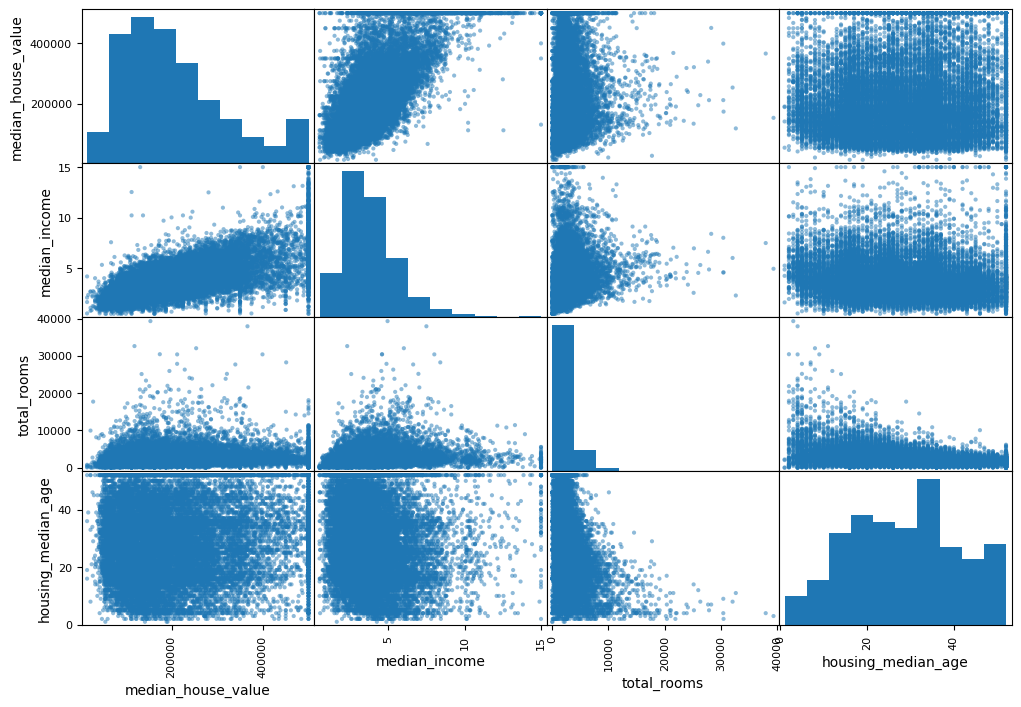

In [ ]:
from pandas.plotting import scatter_matrix

attries = ['median_house_value',"median_income","total_rooms",'housing_median_age']
scatter_matrix(housing[attries],figsize=(12,8))


<Axes: xlabel='median_income', ylabel='median_house_value'>

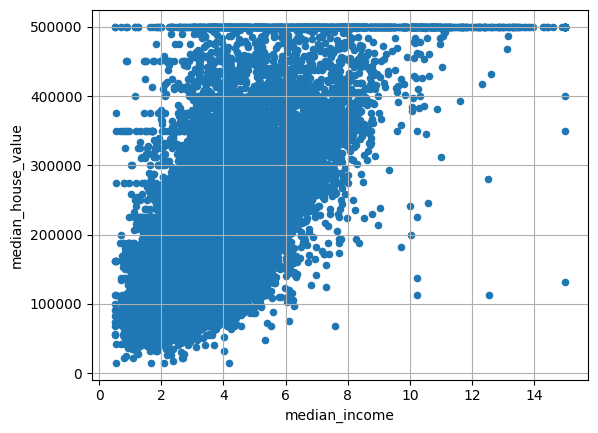

In [ ]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",grid=True)

NameError: name 'housing' is not defined

In [ ]:
corr_matrix["median_house_value"].sort_value(ascending=False)

NameError: name 'corr_matrix' is not defined

In [ ]:
import numpy as np
import pandas as pd

housing['income_cat']= pd.cut(housing['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
splitter = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=40)
strat_splits=[]
for train_index,test_index in splitter.split(housing,housing['income_cat']):
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  strat_splits.append([strat_train_set_n,strat_test_set_n])
strat_train_set,strat_test_set = strat_splits[0]

strat_train_set,strat_test_set = train_test_split(housing,test_size=0.2,stratify=housing['income_cat'],random_state=40)

for set_ in (strat_train_set,strat_test_set):
  set_.drop(['income_cat'],axis=1,inplace=True)

housing = strat_train_set.copy()
corr_matrix = housing.corr(numeric_only=True)

NameError: name 'housing' is not defined

In [ ]:
corr_matrix["median_house_value"].sort_value(ascending=False)

NameError: name 'corr_matrix' is not defined